# グローバー探索アルゴリズム

## 探索問題

コンピューターが解決する問題の多くは、*探索問題*の一種です。皆さんはすでにサーチエンジンを使ってウェブを探索したことがあるでしょう。サーチエンジンとは、ウェブサイトからデータベースを構築し、その中を探索できるようにするプログラムです。データベースとは、住所を入力とし、その住所のデータを出力するプログラムと考えることができます。電話帳はデータベースの一例で、電話帳の各項目には名前と番号が記載されています。例えば、3441番目のデータを出してくださいと頼むと、電話帳の3441番目の名前と番号が返ってきます。

![ブラックボックスデータベース内の情報の流れ。](images/grover/database-phonebook.svg)

<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

このように、入力を与え、出力を読むというプロセスを「データベースへの問い合わせ」と呼んでいます。コンピューターサイエンスではしばしば、データベースをブラックボックスと見なします。つまり、データベースがどのように機能するかを見ることは許されず、約束通りの動作をする魔法のようなプロセスだと仮定します。このような魔法のような処理を「オラクル」と呼びます。

<!-- vale QiskitTextbook.SentenceLengthWarning = YES -->

誰かの名前があって、その人の電話番号を探そうとするとき、本が名前のアルファベット順に並んでいれば、これは簡単です。*二分探索*と呼ばれるアルゴリズムが使えるのです。

<!-- ::: q-block -->

### 例: 二分探索

<!-- ::: q-carousel -->

<!-- ::: div -->

![データベースの例](images/grover/carousel/0/0.svg)

二分探索は、ソートされたデータベースを探索するための非常に効率的な古典的アルゴリズムです。本の中の特定のページを探すとき（あるいは物理的な電話帳を使うとき）にも、似たようなものを使ったことがあるのではないでしょうか。例えば、Evelinaの電話番号を探したいとしましょう。

<!-- ::: -->

<!-- ::: div -->

![二分探索アルゴリズムの最初の手順の例として、コンピューターは中央の項目を選択した](images/grover/carousel/0/1.svg)

まず、データベースの真ん中の項目を調べ、それが探索対象の項目より高いか低いかを確認します。

<!-- ::: -->

<!-- ::: div -->

![二分探索アルゴリズムの2番目の手順](images/grover/carousel/0/2.svg)

この場合、「H」は「E」の後にあります。リストはソートされているので、探している項目のアドレスは7より小さいはずです。6より大きいアドレスは無視し、縮小したリストでこのアルゴリズムを繰り返すことができます。

<!-- ::: -->

<!-- ::: div -->

![二分探索アルゴリズムの3番目の手順](images/grover/carousel/0/3.svg)

今度は、真ん中の項目の名前が「D」で始まり、「E」の前に来ています。これで、この項目のアドレスは3以上でなければならないことがわかりました。

<!-- ::: -->

<!-- ::: div -->

![二分探索アルゴリズムの4番目の手順](images/grover/carousel/0/4.svg)

各ステップで作業しているリストのサイズが半分になるので、探索空間は指数関数的に*縮小*します。

<!-- ::: -->

<!-- ::: div -->

![二分探索アルゴリズムの5番目の手順](images/grover/carousel/0/5.svg)

つまり、非常に大きなデータベースであっても、素早く項目を見つけることができるのです。

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block.exercise -->

### クイッククイズ

<!-- ::: q-quiz(goal="intro-grover-0") -->

必要なデータベースへの問い合わせの最大数は、データベースのエントリー数に応じて対数的（底2）に増加します。

<!-- ::: .question -->

二分探索を使用して、1024個の項目を持つソートされたデータベースを探索するために必要な最大の問い合わせ数は何ですか？

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 10

<!-- ::: -->

<!-- ::: .option -->

1. 1

<!-- ::: -->

<!-- ::: .option -->

1. 100

<!-- ::: -->

<!-- ::: -->

*ヒント: 何回データベースを半分にすれば、1つの項目しか残りませんか？*

<!-- ::: -->

二分探索はデータベースの大きさに応じて[対数的](gloss:logarithm)に成長するので、量子コンピューターが改善する余地はあまりないでしょう。しかし、私たちは常にソートされたリストを探索できるわけではありません。例えば、電話番号が与えられ、その番号に関連する名前を見つけたいとしたらどうでしょう？

電話帳は通常、番号順に並んでいないので、これはかなり難しいです。電話番号がランダムに並んでいると仮定すると、前回のように目的の電話番号を探し出すことはできません。古典的なコンピューターでできることは、入力された住所をランダムに選び、そこに探している電話番号が含まれているかどうかを確認し、偶然に正しい項目に出会うまで繰り返すことです。このため、探索時間を短縮するために、データベースの[索引付け](gloss:index)に多くの労力が費やされています。

このようにデータベースが完全に無秩序な状態を*非構造化*と言います。そして、このページで学ぶ量子アルゴリズムは、非構造化探索のためのアルゴリズムなのです。

<!-- ::: q-block.exercise -->

### 非構造化探索

<!-- ::: q-quiz(goal="intro-grover-1") -->

<!-- ::: .question -->

非構造化データベースを、ランダムに入力を選んで探索する場合、探している項目を見つけるまでに平均何個の入力をチェックする必要があるでしょうか？

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 可能な入力の半分。

<!-- ::: -->

<!-- ::: .option -->

1. 可能な入力すべて。

<!-- ::: -->

<!-- ::: .option -->

1. 可能な入力の4分の3。

<!-- ::: -->

<!-- ::: -->

***

<!-- ::: q-quiz(goal="intro-grover-2") -->

<!-- ::: .question -->

ランダムな推測を用いると、必要なデータベース問い合わせの平均数は、データベースの項目数に応じてどのように増加しますか？

<!-- ::: -->

<!-- ::: .option(correct) -->

1. 線形的。

<!-- ::: -->

<!-- ::: .option -->

1. 対数的。

<!-- ::: -->

<!-- ::: .option -->

1. 2次的。

<!-- ::: -->

<!-- ::: .option -->

1. 指数関数的。

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

このような場合、適当に推測する以上のことはできないと思われるかもしれません。データベース内のどこに正しい項目があるのか見当もつかないし、間違った問い合わせをすると1つの項目が除外されるだけだからです。

<!-- vale QiskitTextbook.SentenceLengthWarning = YES -->

古典的なコンピューターの場合、私たちの直感は正しいのですが、もし私たちのデータベースが量子の重ね合わせ状態を入出力できれば、ランダムな推測よりもうまくいくことがわかります。このページでは、最初の量子アルゴリズム、つまりグローバーの量子探索アルゴリズムについて説明します。 グローバーのアルゴリズムは、構造化されたデータベースでも非構造化データベースでも、入力数の*平方根*で増大するため、非構造化探索では古典アルゴリズムに比べて[2次](gloss:quadratic)の改善をもたらします。

![量子探索と従来の非構造化探索の最適なアルゴリズム実行時間の比較](images/grover/rg-vs-grover.svg)

## ブラックボックスの先にあるもの

探索アルゴリズムは、電話帳のような収集された情報のデータベースを探索することができますが、それ以上のことも可能です。ある問題をデータベース探索の問題のように*見せる*ことができれば、その問題を解くために探索アルゴリズムを使うことができるのです。例えば、[数独](gloss:sudoku)を解くという問題を考えてみましょう。誰かが数独を解いたと主張したら、それが解けたかどうかをかなり速くチェックできます。各行、各列、各マスにそってチェックし、終了します。この意味で、*あなた*がデータベースであり、あなたに解答を与えた人があなたに問い合わせをしているのです。そして、「これは有効な解答です」という情報を返す入力を探そうとしているのです。

実際、多くの計算問題は、「ある出力をもたらす入力を求めよ」という形で提示することができます。

![提案された解決策を評価するプログラムをデータベースとして見ることができます。](images/grover/database-computation.svg)

<!-- vale QiskitTextbook.Acronyms = NO -->

このように解くことができる問題の一例として、充足可能性問題（通称「SAT」）があります。

## SAT問題

SAT問題は計算機科学で広く研究されており、他の多くの計算問題もSAT問題に変換することが可能です。このページではグローバーのアルゴリズムを用いて簡単なSAT問題を解きますが、ここで学んだ技術は、他の問題への量子探索アルゴリズムの適用にも応用できます。

SAT問題の解はビット列であり、量子回路へのマッピングが容易です。問題そのものは、ビット値の異なる組み合わせを排除する条件（我々はこれを節と呼んでいる）の束です。例えば、ビットが3つあったとして、1つの節が「0番目のビットが`ON`*および*1番目のビットが`OFF`であってはならない」であるとした場合、`101`および`001`の組み合わせは有効な解としては排除されます。

ここに*"[3-SAT](gloss:3-sat)"*問題をエンコードしたファイルがあります。これは、すべての節がちょうど3ビットを参照し、各節のこれらのビット条件のうちの1つが満たされなければならないというSAT問題です。 

<!-- ::: q-block -->

### 3-SAT問題の例

これは、「DIMACS CNF」と呼ばれるファイル形式で保存された 3-SAT 問題の例です。このファイルは非常に単純で、SAT 問題を保存する 1 つの方法にすぎません。

$\cssId{_dimacs-c}{\texttt{c example DIMACS-CNF 3-SAT}}$ <br> $\cssId{_dimacs-problem}{\texttt{p cnf 3 5}}$ <br> $\texttt{-1 -2 -3 0}$<br> $\cssId{_dimacs-clause-1}{\texttt{1 -2 3 0}}$ <br> $\texttt{1 2 -3 0}$<br> $\cssId{_dimacs-clause-3}{\texttt{1 -2 -3 0}}$ <br> $\cssId{_dimacs-clause-4}{\texttt{-1 2 3 0}}$ <br>

<!-- ::: -->

<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

数独と同じように、ビット列がSAT問題の有効な解であるかどうかを確認するのは簡単です。各節を順番に見て、文字列がいずれかの節に背くかどうかを確認すればよいのです。このコースでは、量子回路でどのようにこれを行うかは気にしないことにします。SATの解を確認する効率的な古典的アルゴリズムがあることを思い出してください。今はQiskitの内蔵ツールを使って、これを実行する回路を構築するだけです。

<!-- vale QiskitTextbook.SentenceLengthWarning = YES -->

このファイルを`examples/3sat.dimacs`の下に保存しました（実行しているコードからの相対パス）。

In [1]:
with open('examples/3sat.dimacs', 'r', encoding='utf8') as f:
    dimacs = f.read()
print(dimacs)  # let's check the file is as promised

c example DIMACS-CNF 3-SAT
p cnf 3 5
-1 -2 -3 0
1 -2 3 0
1 2 -3 0
1 -2 -3 0
-1 2 3 0


<!-- vale QiskitTextbook.SentenceLengthWarning = NO -->

Qiskit の circuit ライブラリーを使用して、上で説明したオラクルの作業をする回路を構築できます (この回路はもはや魔法ではなく、全能でもありませんが「オラクル」と呼び続けます)。

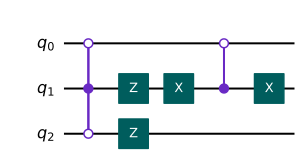

In [2]:
from qiskit.circuit.library import PhaseOracle
oracle = PhaseOracle.from_dimacs_file('examples/3sat.dimacs')
oracle.draw()

上のこの回路は、前に説明したデータベースと似たような働きをします。この回路の入力は3ビットのビット列で、与えられる出力は入力ビット列がSAT問題の解であるか否かに依存します。

このチェックの結果も`True`か`False`のどちらかになりますが、この回路の動作は期待されるものとは若干異なります。この回路をグローバーのアルゴリズムで使うには、状態が解であれば、オラクルは出力状態の位相を180度変える（つまり-1倍する）ようにしたいです。これがQiskitがクラス「`PhaseOracle`」と呼ぶ理由です。

$$
U_\text{oracle}|x\rangle = \bigg\{
\begin{aligned}
\phantom{-}|x\rangle & \quad \text{if $x$ is not a solution} \\
-|x\rangle & \quad \text{if $x$ is a solution} \\
\end{aligned}
$$

例えば、この問題の解は`000`, `011`, `101`だけなので、上の回路はこの行列を持つことになります。

$$
U_\text{oracle} = 
\begin{bmatrix}
-1 & 0 & 0 &  0 & 0 &  0 & 0 & 0  \\
 0 & 1 & 0 &  0 & 0 &  0 & 0 & 0  \\
 0 & 0 & 1 &  0 & 0 &  0 & 0 & 0  \\
 0 & 0 & 0 & -1 & 0 &  0 & 0 & 0  \\
 0 & 0 & 0 &  0 & 1 &  0 & 0 & 0  \\
 0 & 0 & 0 &  0 & 0 & -1 & 0 & 0  \\
 0 & 0 & 0 &  0 & 0 &  0 & 1 & 0  \\
 0 & 0 & 0 &  0 & 0 &  0 & 0 & 1  \\
\end{bmatrix}
$$

まとめると

1. 提案された解答が正しいかどうかを簡単に確認できる問題があります。
2. 解を確認するアルゴリズムを、解の状態の位相を変化させる量子回路に変換することができます。
3. グローバーのアルゴリズムを使って、どの状態の位相が変化したかを調べることができます。

この意味で、データベースやオラクルは、解決すべき*問題なのです*。

![グローバーのアルゴリズムへの入力をオラクル、出力をそのオラクルに対する解とした画像](images/grover/grover-input-output.svg)

## グローバーのアルゴリズムの概要

さて、問題が理解できたところで、いよいよグローバーのアルゴリズムに入ります。グローバーのアルゴリズムは3つのステップからなります。

1. 最初のステップは、オラクルへのすべての可能な入力の等しい重ね合わせを作成することです。もし我々の量子ビットがすべて状態 $|0\rangle$ で始まるとすると、各量子ビットにHゲートを適用してこの重ね合わせを作成することができます。この等しい重ね合わせ状態を「$|s\rangle$」と呼ぶことにします。

2. 次のステップは、これらの量子ビットに対してオラクル回路($U_\text{oracle}$)を走らせることです。このページでは、上でQiskitが作ってくれた回路(`oracle`)を使いますが、解の状態の位相を変える回路やハードウェアなら何でも使えます。

3. 最後ステップは、「拡散演算子」または「ディフューザー」($U_s$)と呼ばれる回路を量子ビットに対して実行することです。この回路は次節のグローバーのアルゴリズムを探る際に確認しますが、どのオラクルでも同じであり、驚くほど単純な回路です。

次に、回路のサイズに応じて、ステップ2と3を数回繰り返す必要があります。ステップ2でオラクルに問い合わせるため、問い合わせの数は可能な入力の数の平方根にほぼ比例することに注意してください。 2 と 3 を適切な回数繰り返すと、測定時にオラクルの解を測定できる可能性が高くなります。

![グローバーのアルゴリズムのコンパクトな回路図](images/grover/grover-circuit-high-level.png)

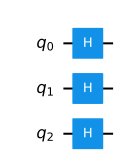

In [3]:
from qiskit import QuantumCircuit
init = QuantumCircuit(3)
init.h([0,1,2])
init.draw()

次に、再びQiskitのツールを使って、ステップ2と3を行う回路を作成します。 

In [4]:
# steps 2 & 3 of Grover's algorithm
from qiskit.circuit.library import GroverOperator
grover_operator = GroverOperator(oracle)

そして、これを組み合わせて、グローバーのアルゴリズムを実行する回路を作ることができます。ここでは、小さな問題なので、ステップ2と3を繰り返さず、1回やれば十分です。

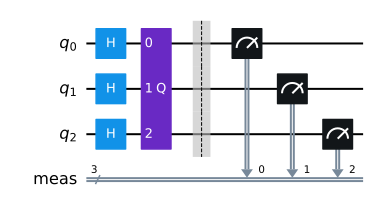

In [5]:
qc = init.compose(grover_operator)
qc.measure_all()
qc.draw()

最後に、これをシミュレーターで動かして、どんな結果が出るか見てみましょう。

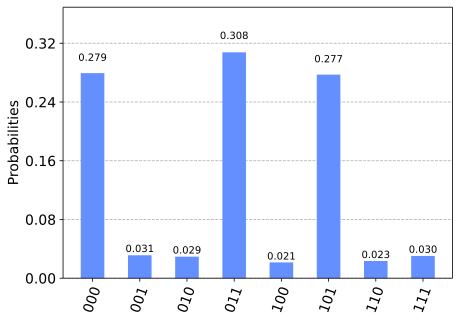

In [6]:
# Simulate the circuit
from qiskit import Aer, transpile
sim = Aer.get_backend('aer_simulator')
t_qc = transpile(qc, sim)
counts = sim.run(t_qc).result().get_counts()

# plot the results
from qiskit.visualization import plot_histogram
plot_histogram(counts)

SAT問題の3つの解のうち、1つを高い確率で測定することができます。

<!-- ::: q-block.exercise -->

### クイッククイズ

<!-- ::: q-quiz(goal="intro-grover-3") -->

<!-- ::: .question -->

この量子回路が解くSAT問題の解は、どのビット列でしょうか？

<!-- ::: -->

<!-- ::: .option(correct) -->

1. `011`

<!-- ::: -->

<!-- ::: .option -->

1. `001`

<!-- ::: -->

<!-- ::: .option -->

1. `010`

<!-- ::: -->

<!-- ::: .option -->

1. `110`

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## グローバーのアルゴリズムの仕組みは？

私たちは、探索問題について学び、グローバーのアルゴリズムがその問題を解くのに使われるのを見てきました。しかし、どのように、そしてなぜ、このようなことができるのでしょうか？

<!-- ::: q-block -->

### グローバーのアルゴリズムの可視化

<!-- ::: q-carousel -->

<!-- ::: div -->

グローバーのアルゴリズムは、幾何学的な説明が充実しています。我々は量子状態をベクトルで表現できることを見てきました。このような探索問題では、2つのベクトルしか気にしません。つまり、解と、それ以外です。すべての解の重ね合わせ状態を「$|✓\rangle$」と呼ぶことにします。上記のSAT問題では、このようになります。

$$|✓\rangle = \tfrac{1}{\sqrt{3}}(|000\rangle + |011\rangle + |101\rangle)$$

そして、それ以外のすべての状態の重ね合わせを「$|✗\rangle$」と呼ぶことにします。

$$|✗\rangle = \tfrac{1}{\sqrt{5}}(|001\rangle + |010\rangle + |100\rangle + |110\rangle + |111\rangle)$$

<!-- ::: -->

<!-- ::: div -->

**平面**

![2D空間のy軸とx軸として|omega>と|s prime>を示す画像](images/grover/carousel/1/0.svg)

2つのベクトル $|✓\rangle$ と $|✗\rangle$ は要素を共有していないので、直交しており、2次元平面上に直角に描くことができます。これがそれぞれy軸とx軸になります。

<!-- ::: -->

<!-- ::: div -->

**ステップ1**

![2D空間のy軸とx軸として|omega>と|s prime>を示す画像](images/grover/carousel/1/1.svg)

アルゴリズムのさまざまなポイントで、この平面上の量子コンピューターの状態をプロットしてみましょう。プロットする最初の状態は $|s\rangle$ です。これは、ステップ 1 (初期化ステップ)*後*の状態です。この状態は、計算上のすべての基底状態を等しく重ね合わせたものです。可能な状態は解であるか解ではないかのどちらかであるため、$|s\rangle$ を $|✓\rangle$ と $|✗\rangle$ の組み合わせとして記述できるため、平面上ではそれらの間に位置します。

$$|s\rangle = a|✗\rangle + b|✓\rangle$$

<!-- ::: -->

<!-- ::: div -->

**ステップ1**

![|omega> / |s-prime>平面上の|s>を示す画像](images/grover/carousel/1/1.svg)

難しい問題の場合、考えられる入力は多数あると予想されますが、解は少数しかありません。この場合、$|s\rangle$ は $|✓\rangle$ よりも $|✗\rangle$ にはるかに近い (つまり、それらの間の角度 $\theta$ が小さい) ため、測定が$|✓\rangle$ を構成する計算基底状態の 1 つを与える可能性は低いです。 私たちの目標は、コンピューターを $|✓\rangle$ にできるだけ近い状態にすることです。

<!-- ::: -->

<!-- ::: div -->

**ステップ2**

![|omega> / |s-prime>平面上のU_omega|s>を示す画像](images/grover/carousel/1/2.svg)

次に、回路 $U_\text{oracle}$ に量子ビットを通します。定義により、$U_\text{oracle}$ はすべての解の状態の位相を反転させることを上で見ました。この図では、ベクトル $|✗\rangle$ を通して鏡映しています。つまり

$$a|✗\rangle + b|✓\rangle \xrightarrow{\text{oracle}} a|✗\rangle - b|✓\rangle$$

<!-- ::: -->

<!-- ::: div -->

**ステップ3**

![|omega> / |s-prime>平面上のU_omega|s>を示す画像](images/grover/carousel/1/2.svg)

先ほど、ベクトル $|✗\rangle$ を通して鏡映できることがわかりましたが、他に状態を $|✓\rangle$ に近づけるようなベクトルはあるでしょうか？答えは「イエス」で、ベクトル $|s\rangle$ を通して鏡映することができます。このような回路をどのように作ればいいのか、最初はわからないかもしれませんが、比較的簡単な操作なので、このページの後半で説明します。

<!-- ::: -->

<!-- ::: div -->

**終了（または繰り返し）**

![|omega> / |s-prime>平面上のU_omega|s>を示す画像](images/grover/carousel/1/3.svg)

このとき、状態ベクトルは前よりも $|✓\rangle$ に近くなっているので、解の状態を測定できる確率が高くなります。解が1つしかない場合、その解を測定する確率が最も高くなるように、ステップ2と3を~$\sqrt{N}$ 回繰り返す必要があります。

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block -->

### オラクルに何回問い合わせれば良いのか？

<!-- ::: q-carousel -->

<!-- ::: div -->

![2D空間のy軸とx軸として|omega>と|s prime>を示す画像](images/grover/carousel/2/0.svg)

これを解決するために、各反復がどれだけ状態を $|✓\rangle$ 方向に回転させるかを計算する必要があります。アルゴリズムの途中で、コンピューターの状態($|\psi\rangle$)が開始状態 $|s\rangle$ から角度 $\phi$ になったとします。このとき、$|\psi\rangle$ と $|✗\rangle$ の間の角度は $\theta + \phi$ です。

<!-- ::: -->

<!-- ::: div -->

![2D空間のy軸とx軸として|omega>と|s prime>を示す画像](images/grover/carousel/2/1.svg)

オラクルはコンピューターの状態ベクトルを $|✗\rangle$ に関して鏡映するので、鏡映後の新しい状態ベクトル($|\psi'\rangle$)と $|✗\rangle$ 間の角度も $\theta + \phi$ となります。

<!-- ::: -->

<!-- ::: div -->

![|omega> / |s-prime>平面上の|s>を示す画像](images/grover/carousel/2/2.svg)

次に、$|s\rangle$ を通して鏡映させます。コンピューターの状態($|\psi'\rangle$)と $|s\rangle$ のなす角は $2\theta + \phi$ です。

<!-- ::: -->

<!-- ::: div -->

![|omega> / |s-prime>平面上のU_omega|s>を示す画像](images/grover/carousel/2/3.svg)

つまり、1回の反復で、コンピューターの状態と $|s\rangle$ の間の角度も $2\theta + \phi$ であることがわかります。

<!-- ::: -->

<!-- ::: div -->

![|omega> / |s-prime>平面上のU_omega|s>を示す画像](images/grover/carousel/2/4.svg)

つまり、各反復はコンピューターの状態を $|✓\rangle$ の方に $2\theta$ だけ回転させるということです。

<!-- ::: -->

<!-- ::: div -->

![|omega> / |s-prime>平面上のU_omega|s>を示す画像](images/grover/carousel/2/5.svg)

あとは、$2\theta$ が直角に何個入るかを調べれば、$|s\rangle$ を $|✓\rangle$ に回転させるのに必要な反復回数が大体わかります。

<!-- ::: -->

<!-- ::: div -->

![|omega> / |s-prime>平面上のU_omega|s>を示す画像](images/grover/carousel/2/6.svg)

では、$N$ から見た角度 $\theta$ はどうなっているでしょうか。三角法を少し使えば、$\sin(\theta)$ は $|s\rangle$ の $|✓\rangle$ 成分を $|s\rangle$ の長さ(それは1)で割ったものに等しいことがわかります。解の状態が1つだけなら、$|s\rangle = \tfrac{1}{\sqrt{N}}(|0\rangle + |1\rangle \dots + |✓\rangle \dots + |N-1\rangle)$ となります。ということは、$\sin(\theta) = \tfrac{1}{\sqrt{N}}$ です。

<!-- ::: -->

<!-- ::: div -->

![|omega> / |s-prime>平面上のU_omega|s>を示す画像](images/grover/carousel/2/7.svg)

最後に、難しい問題では、$\theta$ が非常に小さくなるので、小さい角度に対する近似を使って、$\theta \approx \tfrac{1}{\sqrt{N}}$ ラジアンとすることができます。

<!-- ::: -->

<!-- ::: div -->

![|omega> / |s-prime>平面上のU_omega|s>を示す画像](images/grover/carousel/2/8.svg)

小さい $\theta$ では、$|s\rangle$ を $\pi/2$ ラジアン前後に回転させたいので、およそ $\tfrac{\pi}{2}\div\tfrac{2}{\sqrt{N}} = \tfrac{\pi}{4}\sqrt{N}$ 回反復する必要があることを意味します。反復ごとに1回オラクルに問い合わせるので、正確に1つの解がある場合、必要なオラクルの問い合わせ回数は $\sqrt{N}$ に比例します。

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

<!-- ::: q-block.exercise -->

### クイッククイズ

<!-- ::: q-quiz(goal="intro-grover-4") -->

<!-- ::: .question -->

多くの入力が可能で解がちょうど1つのオラクルでは、$\theta \approx \tfrac{1}{\sqrt{N}}$ です。解が*2つ*ある場合、$\theta$ はどのような近似値を持つでしょうか？

<!-- ::: -->

<!-- ::: .option -->

1. $\theta \approx \tfrac{2}{\sqrt{N}}$

<!-- ::: -->

<!-- ::: .option(correct) -->

1. $\theta \approx \tfrac{\sqrt{2}}{\sqrt{N}}$

<!-- ::: -->

<!-- ::: .option -->

1. $\theta \approx \tfrac{1}{\sqrt{2N}}$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## グローバーのアルゴリズムのための回路

本章の最後に、グローバーのアルゴリズムを実装した簡単な回路を一から作り、その動作を紹介します。2つの量子ビットを使い、オラクル回路を作るところから始めます。

In [7]:
from qiskit import QuantumCircuit

### オラクル

簡単のために、ここでは実際の問題を解決するつもりはありません。このデモでは、状態 $|11\rangle$ の位相を反転させ、それ以外は変化させない回路を作ることにします。幸いなことに、我々はまさにそれを行う2量子ビットゲートを既に知っています。

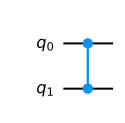

In [8]:
oracle = QuantumCircuit(2)
oracle.cz(0,1)  # invert phase of |11>
oracle.draw()

この回路の行列表現を示す短い関数を紹介します。

In [9]:
def display_unitary(qc, prefix=""):
    """Simulates a simple circuit and display its matrix representation.
    Args:
        qc (QuantumCircuit): The circuit to compile to a unitary matrix
        prefix (str): Optional LaTeX to be displayed before the matrix
    Returns:
        None (displays matrix as side effect)
    """
    from qiskit import Aer
    from qiskit.visualization import array_to_latex
    sim = Aer.get_backend('aer_simulator')
    # Next, we'll create a copy of the circuit and work on
    # that so we don't change anything as a side effect
    qc = qc.copy()
    # Tell the simulator to save the unitary matrix of this circuit
    qc.save_unitary()
    unitary = sim.run(qc).result().get_unitary()
    display(array_to_latex(unitary, prefix=prefix))

display_unitary(oracle, "U_\\text{oracle}=")

<IPython.core.display.Latex object>

<!-- ::: q-block.exercise -->

### 試してみよう

他の3つの計算基底状態($|00\rangle$, $|01\rangle$, $|10\rangle$)をターゲットとするオラクル回路をあと3つ作れますか？答えを確認するために`display_unitary`を使用してください。

*ヒント:* ターゲットにしている基底状態との間で $|11\rangle$ を変換し合う回路を作成してみてください。次に、その回路を`cz`ゲートと共に使用できますか？

[IBM Quantum Labで試してみましょう。](https://quantum-computing.ibm.com/lab)

<!-- ::: -->

### ディフューザー(拡散演算子)を作成する

次に、2つの量子ビットのためのディフューザーを作成します。ここでは状態 $|s\rangle$ に関して鏡映させたいことを思い出して、すでにある道具を使ってこの鏡映を行う回路を作ってみましょう。

`cz`ゲートが（グローバル位相の違いを除いて）$|11\rangle$ に関して鏡映することは既に見たので、$|s\rangle \rightarrow |11\rangle$ を写す変換が分かれば、次のようにできます。

1. 変換 $|s\rangle \rightarrow |11\rangle$ を実行する
2. $|11\rangle$ に関して鏡映する。（つまり、`cz`ゲート）
3. 変換 $|11\rangle \rightarrow |s\rangle$ を実行する

各量子ビットに H ゲートを適用することで、状態 $|00\rangle$ から状態 $|s\rangle$ を作成できることがわかっています。 H ゲートは自分自身の逆行列でもあるため、H ゲートを各量子ビットに適用すると、$|s\rangle \rightarrow |00\rangle$にもなります。

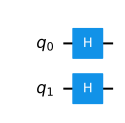

In [10]:
diffuser = QuantumCircuit(2)
diffuser.h([0, 1])
diffuser.draw()

ここで、$|00\rangle \rightarrow |11\rangle$ をどのように変換するかを考えなければなりません。

<!-- ::: q-block.exercise -->

### クイッククイズ

<!-- ::: q-quiz(goal="intro-grover-5") -->

<!-- ::: .question -->

これらのゲートのうち、$|0\rangle \rightarrow |1\rangle$ の変換をするものはどれですか？

<!-- ::: -->

<!-- ::: .option(correct) -->

1. `x`

<!-- ::: -->

<!-- ::: .option -->

1. `z`

<!-- ::: -->

<!-- ::: .option -->

1. `h`

<!-- ::: -->

<!-- ::: .option -->

1. `s`

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

つまり、それぞれの量子ビットにXゲートを適用すると、変換 $|00\rangle \rightarrow |11\rangle$ が行われます。そうしてみましょう。

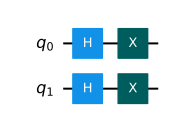

In [11]:
diffuser.x([0,1])
diffuser.draw()

これで変換 $|s\rangle \rightarrow |11\rangle$ ができたので、`cz`ゲートを適用し、そして変換を逆にすることができます。

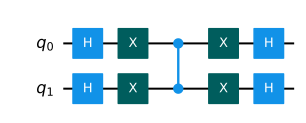

In [12]:
diffuser.cz(0,1)
diffuser.x([0,1])
diffuser.h([0,1])
diffuser.draw()

### まとめると

これで`oracle`と`diffuser`の2つの回路ができたので、これをまとめてグローバーのアルゴリズムを実行する回路にすることができます。3つのステップを思い出してください。

1. 量子ビットを状態 $|s\rangle$ に初期化する
2. オラクルを実行する
3. ディフューザーを実行する

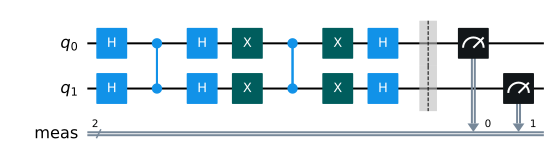

In [13]:
grover = QuantumCircuit(2)
grover.h([0,1])  # initialise |s>
grover = grover.compose(oracle)
grover = grover.compose(diffuser)
grover.measure_all()
grover.draw()

そして、シミュレーションをしてみると、100%の確率で、オラクルの解である $|11\rangle$ を測定していることがわかるのです。

In [14]:
from qiskit import Aer
sim = Aer.get_backend('aer_simulator')
sim.run(grover).result().get_counts()

{'11': 1024}

<!-- ::: q-block.exercise -->

### 試してみよう

この回路のオラクルを、上で作成した異なるオラクルに置き換えてみてください。期待通りの結果が得られますか？

[IBM Quantum Labdeで試してみましょう。](https://quantum-computing.ibm.com/lab)

<!-- ::: -->

## SAT問題は困難である

![問題のサイズとアルゴリズムの実行時間のグラフ。ランダムな推測とグローバーのアルゴリズムの両方が指数曲線として表示され、グローバーはランダムな推測よりもわずかに遅く増大する。](images/grover/rg-vs-grover-sat.svg)

ランダムな推測はデータベースの項目数に比例して増大します。これは実はそれほど悪いことではありません（もっとうまくできることは分かっていますが）が、我々は通常、アルゴリズムがどのように増大するかを、入力*ビット*の長さで測ります。では、この2つはどのように結びついているのでしょうか？SAT問題で変数（ビット）が増えるごとに、可能な解の数（つまりデータベースの項目）は*2倍*になるので、探索空間はビット数について指数関数的に大きくなります。

$$\cssId{Big-N}{N} = 2^\cssId{lil-n}{n}$$

ランダムな推測は $N$ について線形に成長するので、実行時間はおおよそ $2^n$ で増大することになります。

<!-- ::: q-block.exercise -->

### クイッククイズ

<!-- ::: q-quiz(goal="intro-grover-6") -->

<!-- ::: .question -->

グローバーのアルゴリズムの実行時間は、（解が1つしかない場合）入力ビット数に応じてどのように増大しますか？

<!-- ::: -->

<!-- ::: .option -->

1. $\sqrt{n}$

<!-- ::: -->

<!-- ::: .option -->

1. $2^n$

<!-- ::: -->

<!-- ::: .option(correct) -->

1. $\sqrt{2^n}$

<!-- ::: -->

<!-- ::: .option -->

1. $\sqrt{2^{n/2}}$

<!-- ::: -->

<!-- ::: -->

<!-- ::: -->

## 構造を利用する

これまで、SAT問題は全く構造化されていないかのように扱ってきましたが、分類されていない電話帳とは異なり、探索に役立ついくつかの手がかりが*確かに*あります。SAT問題はブラックボックスではなく、個々の節の集合であり、これらの節を使って正解にたどり着くことができるのです。二分探索のような効率的なものは得られませんが、それでも無作為に推測するよりはずっと良いでしょう。SAT問題の構造を利用した（古典的な）アルゴリズムにシェーニングのアルゴリズムがあります。

![問題のサイズとアルゴリズムの実行時間のグラフ。ランダムな推測、グローバーのアルゴリズム、およびシェーニングのアルゴリズムは指数曲線として示され、シェーニングはグローバーよりもわずかに遅く増大し、グローバーはランダムな推測よりもゆっくりと増大する](images/grover/rg-vs-grov-vs-schoning.svg)

シェーニングのアルゴリズムは、ランダムな推測と同じように、ランダムに入力を選び、それがうまくいくかどうかをチェックします。しかし、ランダムな推測とは異なり、このビット列をただ捨てるわけではありません。その代わりに、不満足な節を選び、その節を満足させるようにビット列のビットを切り替えます。残念なことに、この新しいビット列は、以前に満足させた別の節を満足させないかもしれません。しかし、平均的には、このように何度かビットを切り替えていくことが有効なのです。最初の推測が十分に近ければ、正解に行き着く可能性が高いです。そうでない場合は、何度目かの手順で、コンピューターは完全にランダムな新しい推測からやり直します。3-SATでは（(&gt;3)-SATではありませんが）、このアルゴリズムはおよそ $1.3334^n$ で増大することがわかります。これはランダムな推測に勝るだけでなく、グローバーのアルゴリズムにも勝るのです。

![問題のサイズとアルゴリズムの実行時間のグラフ。ランダムな推測、グローバー、シェーニング、および「グローバー+シェーニング」のアルゴリズムが指数曲線で表示されている。「グローバー+シェーニング」はシェーニングよりもかなり遅く、グローバーよりもわずかに遅く、さらにランダムな推測よりも遅く増大する](images/grover/all-algos.svg)

一見するとわかりませんが、実はグローバーのアルゴリズムとシェーニングのアルゴリズムを組み合わせることで、どちらか一方だけよりもさらに優れたものを得ることができます。シェーニングのアルゴリズムのビット切り替えの部分を実行する回路を作れば、これをオラクルとして、グローバーのアルゴリズムで最適な「初期推測」を見つけることができます。この講座では触れませんが、それを調べるのも楽しいプロジェクトです。